<a href="https://colab.research.google.com/github/qwasd34/DEV_DATA/blob/main/%5B%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A7%88%EC%9D%B4%EB%8B%9D_%5D_%E1%84%80%E1%85%A1%E1%86%B7%E1%84%8C%E1%85%A5%E1%86%BC_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8_%E1%84%86%E1%85%A9%E1%84%83%E1%85%A6%E1%86%AF_%E1%84%8B%E1%85%A1%E1%86%AF%E1%84%80%E1%85%A9%E1%84%85%E1%85%B5%E1%84%8C%E1%85%B3%E1%86%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드



yelp 로컬 음식 리뷰 사이트


In [21]:
import pandas as pd

file_path = 'yelp_labelled.txt'
data = pd.read_csv(file_path, names=['text', 'sentiment'], sep='\t')

data.head()

,text,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [22]:
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

sentiment
1    500
0    500
Name: count, dtype: int64


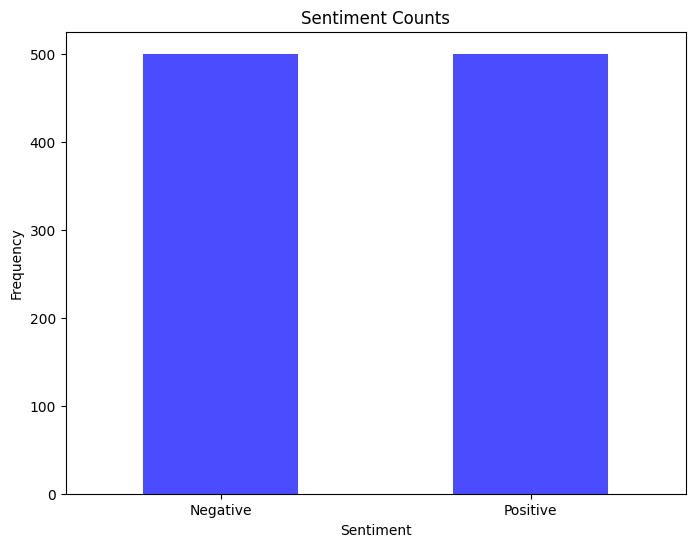

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.show()

# 전처리 (Tokenize, Stop Words + alpha)

In [24]:
# 예시 문장 임의로 선택
example_text = data['text'][0]
print(example_text)

Wow... Loved this place.


In [25]:
# 소문자로 통일
example_text = example_text.lower()
print(example_text)

wow... loved this place.


In [26]:
# 비 단어적 요소 제거
# re 패키지 이용 (정규표현)
#\W - 단어가 아닌것들
import re

example_text = re.sub(r'\W', ' ', example_text)
print(example_text)

wow    loved this place 


In [27]:
# tokenize 적용
example_text = example_text.split()
print(example_text)

['wow', 'loved', 'this', 'place']


In [28]:
# stop words 제거 이미 사전에 정의가 되어있음! 가져다 쓰면됨
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
example_text = [text for text in example_text if text not in stop_words]
print(example_text)

['wow', 'loved', 'place']


In [30]:
# 최종 함수로 표현
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocessing(text) :
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = text.split()
    text = [t for t in text if t not in stop_words]
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
print(preprocessing(data['text'][0]))

['wow', 'loved', 'place']


In [32]:
# 기존 데이터 프레임 업데이트 각각행에 다 적용!
# apply 함수 사용
data['preprocessed'] = data['text'].apply(preprocessing)
data.head()

,text,sentiment,preprocessed
0,Wow... Loved this place.,1,"[wow, loved, place]"
1,Crust is not good.,0,"[crust, good]"
2,Not tasty and the texture was just nasty.,0,"[tasty, texture, nasty]"
3,Stopped by during the late May bank holiday of...,1,"[stopped, late, may, bank, holiday, rick, stev..."
4,The selection on the menu was great and so wer...,1,"[selection, menu, great, prices]"


# 문장의 임베딩 구하기

## GloVe 적용

In [33]:
from gensim.downloader import load

# 너무 큰 차원은 시간이 오려걸려 100 차원으로 로드 진행
# 약 2분 소요
glove = load('glove-wiki-gigaword-100')

In [35]:
preprocessed_word = data['preprocessed'][0]
# wow love place 각각100개의 숫자로 표현이됨
for word in preprocessed_word :
    print(word, glove[word])

wow [ 3.3134e-02  3.9436e-01  7.1448e-01 -1.1337e+00 -7.2332e-01 -3.8481e-01
  5.0780e-01 -1.4907e-01  6.6017e-01 -1.0201e-01  9.6231e-01  1.1387e-03
 -1.3263e-01  4.5797e-02  2.7135e-01 -3.2550e-01 -3.9210e-01  6.5267e-01
 -2.4488e-01  6.0425e-01  4.6606e-01  2.0726e-01 -4.5639e-01 -4.7955e-01
  3.5442e-01  1.3614e+00  6.4953e-02  5.8670e-01  3.8000e-01 -6.9888e-01
 -9.8310e-03  4.4655e-01  3.2409e-01  7.0773e-01 -1.6529e-01  1.4208e-01
 -1.0592e-01  3.4966e-01  4.9768e-01 -1.3657e+00  5.9729e-02  8.9261e-01
 -5.1973e-02 -2.3988e-01 -2.6148e-01 -4.6569e-01  3.8102e-01 -2.2734e-02
  6.7690e-02 -5.2129e-01 -1.0081e+00  3.2135e-01  1.3263e-02 -3.2060e-01
 -1.2772e+00 -9.8548e-01  5.2983e-01 -6.2298e-02  2.2495e-01 -2.6118e-03
 -6.1793e-01  9.9997e-01 -1.0703e+00  2.0964e-01  2.2643e-01  4.3646e-01
  3.7288e-01  4.4264e-01  1.9080e-01  2.0068e-01  9.2300e-01 -4.9012e-02
 -1.2524e-01 -4.6946e-01  4.9879e-02  7.7502e-01  7.5118e-01 -6.8137e-01
  6.9687e-01 -7.6334e-01  1.3828e-01 -7.7210e-0

## TF-IDF 적용

- TF-IDF
    
    하나의 단어가 가지고 있는 중요도 (평균보다 정확함)
    
    - 단어마다 가중치를 적용해 문장 임베딩을 생성
    - 문장내 단어의 중요도를 나타내는 척도
    - 이 값을 이용해 각 단어 임베딩에 가중
    - 가중된 값들을 활용해 평균값 활용
        - TF 파트와 IDF 파트의 곱으로 계산
            
            ![Untitled](https://prod-files-secure.s3.us-west-2.amazonaws.com/44036099-e788-407f-8f33-75e30140b831/1eac172c-edf6-4040-9fe0-09689b444563/Untitled.png)
            
        - TF ( TermFrequency)  단어의 빈도
            - 특정 단어가 문서내에 얼마나 자주 등장하는지
                
                ![Untitled](https://prod-files-secure.s3.us-west-2.amazonaws.com/44036099-e788-407f-8f33-75e30140b831/d7c0ae72-ac08-4713-873d-8b8d69c324e7/Untitled.png)
                
        - IDF (Inverse Document Frequency) 역 문서 빈도
            - 특정 단어가 얼마나 여러 문서에서 등장하는지
            - 모든 문서에 자주등장한 단어: 중요도가 낮음 → 값이 낮음
            - 특정 문서에서만 자주 등장: 중요도가 높음 → 값이 높음
            - D : 전체문서집합을 의미
        - TF-IDF 값은 문서d 안에서 단어 t가 갖는 상대적 중요도
            - 높은 TF-IDF 값을 갖는 단어는 해당 문서에서 더 많은 정보를 제공
            - 전체 문서 집합 D에서 보다 의미 있는 특징을 갖고있음

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform([' '.join(doc) for doc in data['preprocessed']]) # 모든 문장을 모아 하나의 큰 문서 덩어리를 생성
tfidf_feature_names = vectorizer.get_feature_names_out()

In [37]:
tfidf_feature_names

array(['00', '10', '100', ..., 'yum', 'yummy', 'zero'], dtype=object)

In [39]:
import numpy as np
np.where(tfidf_feature_names == 'wow')[0][0]

1889

In [41]:
for word in preprocessed_word :
    doc_idx = 0 # 0 : 원래 문서의 0번째 문장이므로
    word_idx = np.where(tfidf_feature_names == word)[0][0] # 단어 집합으로부터 word의 위치를 찾아냄

    value = tfidf_matrix.toarray()[doc_idx][word_idx]
    # toarray() : tf-idf matrix가 0이 많은 sparse matrix여서 이를 원래 0과 숫자값으로 이루어진 형태로 변환

    print(f'{word}의 tf-idf 값 : {value:.4f}')
    # 단어들의 중요도 !

wow의 tf-idf 값 : 0.7135
loved의 tf-idf 값 : 0.6028
place의 tf-idf 값 : 0.3571


## 함수로 표현

In [42]:
import numpy as np

def sentence_embedding(tfidf_matrix, tfidf_feature_names, doc, doc_idx):
    embeddings = []
    for word in doc:
        # GloVe에서 학습한 데이터와 tf-idf에서 학습한 데이터만 취급
        # 그렇지 않은 데이터는 무시됨
        if word in glove and word in tfidf_feature_names:
            # 여기서는 transform을 쓰지 않고 이미 학습한 matrix에서 indexing으로 가져옴
            # 속도 효율성이 높음
            # 만약 처음 보는 문장에 대해서 TF-IDF를 한다면 transform이 필수!
            word_idx = np.where(tfidf_feature_names==word)[0][0]
            tfidf_weight = tfidf_matrix.toarray()[doc_idx, word_idx]

            embeddings.append(glove[word] * tfidf_weight) #TFIDF 곱해서 만들어
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(100)  # GloVe 차원에 맞춰 조정
    # 평균을 취해서 가지고와

In [43]:
preprocessed_word

['wow', 'loved', 'place']

In [44]:
sentence_embedding(tfidf_matrix, tfidf_feature_names, preprocessed_word, 0) # 예시 문장은 0번째 위치의 문장!

array([ 0.0166593 ,  0.23227139,  0.21521084, -0.3023679 , -0.2852808 ,
        0.09835947,  0.05447771, -0.07844364,  0.12750281, -0.06023952,
        0.28007463,  0.11944699,  0.07260192, -0.07175703, -0.03128212,
       -0.19379973,  0.06767368,  0.2120573 , -0.25992265,  0.43483153,
        0.1444536 ,  0.13265453, -0.03620065, -0.26992652,  0.19761361,
        0.30385765, -0.08506642,  0.05645426,  0.24448216, -0.16316617,
       -0.00325877,  0.19798256,  0.16366552,  0.2505027 , -0.01592364,
        0.10984685, -0.10182228,  0.23466535,  0.13963214, -0.4948854 ,
       -0.04828039,  0.12436902,  0.10708094, -0.19833356, -0.11882914,
       -0.01156988,  0.11614751,  0.05549104,  0.12373925, -0.3981682 ,
       -0.17899461,  0.06053011,  0.00293016,  0.21120745, -0.38191912,
       -0.81201744,  0.10945544,  0.07927296,  0.23233421,  0.09520606,
       -0.23621698,  0.66045576, -0.33795807, -0.08933165,  0.2110296 ,
        0.07969923,  0.23234273,  0.19219716, -0.0248637 , -0.05

In [46]:
# 문장 임베딩 값을 새로운 열로 저장
# 여러 입력을 넣어주기 위해 lambda 함수를 활용하고
# 특정 행을 의미하는 row를 이용해 행 번호를 넣어줌 (row.name)
data['sentence_emb'] = data.apply(lambda row: sentence_embedding(tfidf_matrix,
                                                                 tfidf_feature_names,
                                                                 row['preprocessed'],
                                                                 row.name), axis=1)
data.head()

,text,sentiment,preprocessed,sentence_emb
0,Wow... Loved this place.,1,"[wow, loved, place]","[0.016659297, 0.23227139, 0.21521084, -0.30236..."
1,Crust is not good.,0,"[crust, good]","[-0.45803148, 0.23974453, 0.31130558, -0.07421..."
2,Not tasty and the texture was just nasty.,0,"[tasty, texture, nasty]","[-0.31745905, 0.21565543, 0.08801329, -0.21695..."
3,Stopped by during the late May bank holiday of...,1,"[stopped, late, may, bank, holiday, rick, stev...","[-0.0070962342, -0.12484046, 0.015604879, -0.1..."
4,The selection on the menu was great and so wer...,1,"[selection, menu, great, prices]","[-0.045577243, 0.13483183, 0.2253097, -0.03041..."


# 로지스틱 회귀 모델 학습 및 평가

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = np.stack(data['sentence_emb'].values)
y = np.stack(data['sentiment'].values)

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train

array([[-0.26887372,  0.16385812,  0.36850357, ...,  0.03234627,
         0.22914058, -0.10332173],
       [ 0.02895319,  0.02608283,  0.12037811, ..., -0.17071882,
         0.11515228,  0.03565452],
       [-0.09933347,  0.07719884,  0.01101923, ...,  0.11057529,
         0.17954358,  0.05213453],
       ...,
       [-0.05420711,  0.00744642,  0.16055354, ..., -0.06578694,
         0.09308692,  0.2599695 ],
       [-0.03125957,  0.13235997,  0.10777359, ..., -0.2122567 ,
         0.10834097, -0.07275223],
       [-0.08099844,  0.07412213,  0.17458348, ..., -0.0626343 ,
         0.24830176,  0.06297494]])

In [49]:
y_train

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,

In [50]:
# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
# 학습 결과 확인을 위해 검증 데이터 추론 진행
predictions = model.predict(X_test)

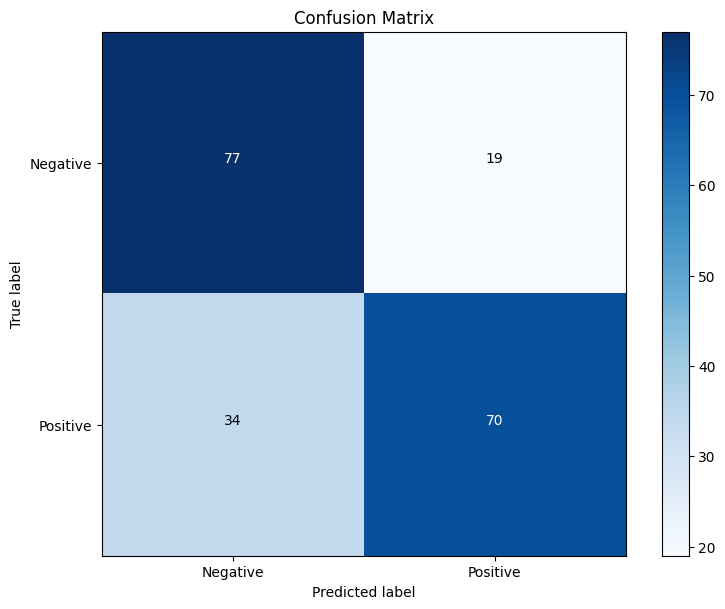

In [52]:
# 분류 문제이므로 분류 과정에서 많이 사용하는 평가 척도 사용

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])

# 각 칸에 실제 값 표시
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Precision, Recall, F1-Score 계산
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# 결과 출력
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.73
Precision: 0.79
Recall: 0.67
F1-Score: 0.73


# 가상 데이터를 활용한 문장 분석 결과 확인

In [54]:
# 음식점에 대한 만족도 관련 텍스트를 임의로 생성

examples = [
    "This restaurant had the best service I've ever experienced.", # 긍정적
    "Extremely disappointed with the late delivery.", # 부정적
    "The ambiance was enchanting and very relaxing.", # 긍정적
    "Unfortunately, the food was bad and uninspired.", # 부정적
    "Amazing cocktails and a vibrant atmosphere!", # 긍정적
    "Waited an hour for our table, even with a reservation.", # 부정적
    "The pasta dish was a delightful surprise with its rich flavors.", # 긍정적
    "Too noisy to enjoy our meal, and the tables were too close together.", # 부정적
    "Exceptional customer service and a very friendly staff.", # 긍정적
    "The dessert was undercooked and not what we expected.", # 부정적
]

In [55]:
# 예제 문장 전처리
preprocessed_examples = [preprocessing(text) for text in examples]

# 원래 문장의 분포와 비슷한 문장들을 활용해 TF-IDF 메트릭스를 다시 생성하고
examples_vectorizer = TfidfVectorizer()
examples_tfidf_matrix = examples_vectorizer.fit_transform([' '.join(doc) for doc in preprocessed_examples])
examples_tfidf_feature_names = examples_vectorizer.get_feature_names_out()

# TF-IDF 값과 GloVe 임베딩을 결합하여 문장 임베딩 생성
example_sentence_embs = []
for doc_idx, doc in enumerate(preprocessed_examples):
    example_sentence_embs.append(sentence_embedding(examples_tfidf_matrix,
                                                    examples_tfidf_feature_names,
                                                    doc, doc_idx))

# 모델을 이용해 감정 분석 수행
example_sentence_embs = np.array(example_sentence_embs)
predictions = model.predict(example_sentence_embs)

# 결과 출력
for idx, (text, pred) in enumerate(zip(examples, predictions)):
    origin_sent = '긍정적' if idx % 2 == 0 else '부정적'
    pred_sent = '긍정적' if pred == 1 else '부정적'

    print(f"문장: {text} \n원래 감정 : {origin_sent} / 예측 : {pred_sent}", end='\n\n')

문장: This restaurant had the best service I've ever experienced. 
원래 감정 : 긍정적 / 예측 : 긍정적

문장: Extremely disappointed with the late delivery. 
원래 감정 : 부정적 / 예측 : 부정적

문장: The ambiance was enchanting and very relaxing. 
원래 감정 : 긍정적 / 예측 : 긍정적

문장: Unfortunately, the food was bad and uninspired. 
원래 감정 : 부정적 / 예측 : 부정적

문장: Amazing cocktails and a vibrant atmosphere! 
원래 감정 : 긍정적 / 예측 : 긍정적

문장: Waited an hour for our table, even with a reservation. 
원래 감정 : 부정적 / 예측 : 부정적

문장: The pasta dish was a delightful surprise with its rich flavors. 
원래 감정 : 긍정적 / 예측 : 긍정적

문장: Too noisy to enjoy our meal, and the tables were too close together. 
원래 감정 : 부정적 / 예측 : 긍정적

문장: Exceptional customer service and a very friendly staff. 
원래 감정 : 긍정적 / 예측 : 긍정적

문장: The dessert was undercooked and not what we expected. 
원래 감정 : 부정적 / 예측 : 부정적

